# Assignment 3: Understanding cross validation and grid search

In this notebook, you will work through a series of exercises designed to deepen your understanding of cross validation and grid search methods using SciKit-learn. The assignment requires code-based solutions—**manually computed or hard-coded results will not be accepted**. 

### Instructions:
- Write your solutions in the provided cells without altering or removing the test cells.
- Upon completion, submit the notebook in **.ipynb** format through Moodle.

In [1]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
# Do not add any cells before this one.
# This cell must remain as the first cell in your notebook for proper functionality.


<div class="alert alert-warning">

As in the previous assignment, the following cell provides two functions: one for result visualization and another for synthetic data generation. **Please DO NOT MODIFY** these functions.

You may reuse parts of this code for the final open-ended question, but ensure that both functions remain unchanged in their original forms for the guided exercises.

- The `plot_decision_surface` function creates a scatter plot showing training data points (represented by circles) and test data points (diamonds), along with the model's decision boundary.

- The `make_spirals` function generates a synthetic dataset in a spiral pattern, suitable for testing complex decision boundaries.
  
</div>

In [2]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import set_config
import pandas as pd

set_config(transform_output="pandas")


def plot_decision_surface(X_train, y_train, X_test=None, y_test=None, model=None, show_points=True, title=None):
    if X_train.shape[1] != 2:
        raise ValueError(f'Incorrect shape {X.shape}, can only plot 2D datasets')

    # just plot the dataset first
    cm = 'coolwarm'
    cm_bright = ListedColormap(['#0000FF', '#FF0000', ])

    fig, ax = plt.subplots()

    if model is not None:
        x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
        y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        X_mesh = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z = model.decision_function(X_mesh)
        except AttributeError:
            try:
                Z = model.predict_proba(X_mesh)[:, 1]
                if Z.min() >= 0:
                    Z = Z * 2 - 1
            except AttributeError:
                Z = model.predict(X_mesh)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z_max = np.abs(Z).max()
        cs_contourf = ax.contourf(xx, yy, Z, levels=10, cmap=cm, alpha=.8, vmin=-Z_max, vmax=Z_max, )
        cs_contour = ax.contour(xx, yy, Z, [-1, 0, 1], linewidths=[1, 2, 1], alpha=0.5,
                                colors=('#0000FF', 'gray', '#FF0000'))

        # Make a colorbar for the ContourSet returned by the contourf call.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = ax.figure.colorbar(cs_contourf, cax=cax)
        # Add the contour line levels to the colorbar
        try:
            cbar.add_lines(cs_contour)
        except Exception:
            pass
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

    if show_points:
        # # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   #edgecolors='k', 
                   alpha=0.25)
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
        #                edgecolors='k', alpha=0.6, s=140)
        if X_test is not None:
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       #edgecolors='k',
                       # s=100,
                       marker='D')

    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_aspect('equal', 'box')
    if title is not None:
        ax.set_title(title)
    plt.show()


def make_spirals(n_samples=100, noise=0, n_turns=2.5, random_state=42, spread=1.0):
    np.random.seed(random_state)
    n_class = int(np.ceil(n_samples / 2))
    n = np.sqrt(np.random.rand(n_class, 1)) * n_turns * (2 * np.pi)
    d1x = -np.cos(n) * n * spread
    d1y = np.sin(n) * n * spread

    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    X += noise * np.random.randn(*X.shape)
    y = np.hstack([np.zeros(n_class), np.ones(n_class)])
    X = X[:n_samples]
    y = y[:n_samples]
    return X, y

<div class="alert alert-info"><b>Exercise 1: Synthetic dataset generation</b>

Write code to generate the feature matrix `X` and the target array `y` using the `make_spirals` function defined in this notebook with the parameters: `n_samples=625`, `noise=0.3`, and `spread=0.5`. After creating the dataset, call `plot_decision_surface(X, y)` to visualize the data distribution.


<br><i>[0.25 points]</i>
</div>
<div class="alert alert-warning">

Python is case-sensitive, so ensure your code matches the required capitalization.

</div>

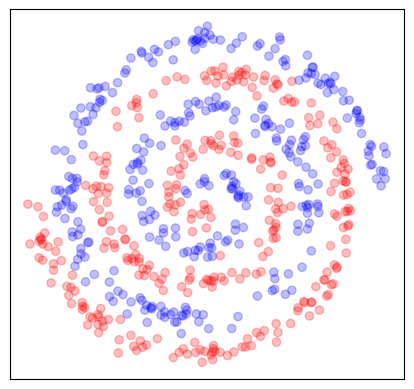

In [3]:
# Create the dataset
X, y = make_spirals(n_samples=625, noise=0.3, spread=0.5)

# Plot the data
plot_decision_surface(X, y)

In [4]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 2: Train-test split </b>

Write code to split the generated dataset into training and testing sets using scikit learn, allocating 80% of the data for training and 20% for testing. Use `random_state=42` to ensure reproducibility. Store the resulting arrays in `X_train`, X_test, y_train, and y_test. After creating the dataset, call again plot_decision_surface(X_train, y_train, X_test, y_test) to visualize the train and test data distribution.
<br><i>[0.25 points]</i>
</div>

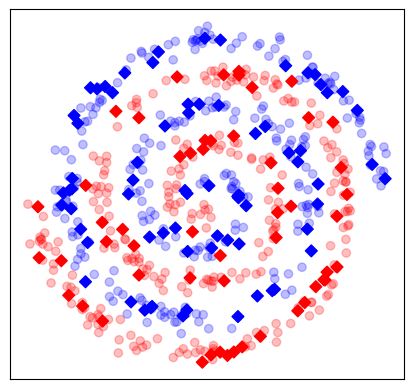

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plot_decision_surface(X_train, y_train, X_test, y_test)

In [6]:
# LEAVE BLANK

In [7]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3: Create cross-validation folds </b>

After splitting the complete dataset into training and test sets, the next step is to implement a 5-fold stratified cross-validation strategy to assess our model’s performance. Write code to create a list named `fold_indexes`, which will store the training sample indices used in each fold. 

Each of the five elements in `fold_indexes` should contain an array of sample indices specific to that fold. Since the synthetic dataset is balanced, ensure that each fold remains stratified by including 50% of indices from samples where `y_train == 0` and 50% from samples where `y_train == 1`.

<br><i>[1 point]</i>
</div>

<div class="alert alert-warning">

Store only the sample indices in the `fold_indexes` list, not the actual values. This way, you can later retrieve both the sample values and their corresponding target labels in the following exercises.

</div>

In [8]:
from sklearn.model_selection import StratifiedKFold

# Initializing the result list and saving the cross validation strategy
fold_indexes = []
cross_val_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterating through the fold results to add training indices to the list
for train, _ in cross_val_strat.split(X_train, y_train):
    fold_indexes.append(train)

fold_indexes

[array([  0,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  21,  22,  23,  24,  26,  28,  29,  32,  33,
         35,  37,  38,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,  64,
         66,  67,  68,  69,  71,  73,  74,  75,  76,  79,  80,  81,  82,
         83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  97,
         98, 100, 102, 103, 105, 106, 107, 109, 110, 111, 112, 113, 114,
        115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 146, 147, 149, 150, 151, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173,
        174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 197, 200, 203, 204, 205,
        207, 208, 209, 210, 212, 213, 214, 215, 216

In [9]:
# LEAVE BLANK

In [10]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4: Create folds combinations</b>

Once the folds are created, write code to generate the index combinations for the training and validation sets at each cross-validation step. Store these combinations in a list named `folds`, which should contain five tuples. Each tuple should have two elements:

1. The indices for the training samples (i.e., the combined indices of the four folds used for training).
2. The indices for the validation samples (i.e., the indices of the fold designated for validation in that step).

<br><i>[1 point]</i>
</div>

In [11]:
### Note: Cannot clearly understand the question.

# Initializing the result list
folds = []

# Iterating through the fold results to add training and validation indices to the result list
for train, val in cross_val_strat.split(X_train, y_train):
    folds.append((train, val))

folds

[(array([  0,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  21,  22,  23,  24,  26,  28,  29,  32,  33,
          35,  37,  38,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
          50,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,  64,
          66,  67,  68,  69,  71,  73,  74,  75,  76,  79,  80,  81,  82,
          83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  97,
          98, 100, 102, 103, 105, 106, 107, 109, 110, 111, 112, 113, 114,
         115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 146, 147, 149, 150, 151, 154, 155, 156, 157, 158, 159,
         160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173,
         174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
         188, 189, 190, 191, 192, 193, 194, 195, 197, 200, 203, 204, 205,
         207, 208, 209, 210, 212, 213,

In [12]:
# LEAVE BLANK

In [13]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5: Generate model candidates for the grid search </b>

Write code to create a collection of decision tree model candidates using the following hyperparameters:

- `max_depth`: [None, 3, 5, 7]
- `criterion`: ['gini', 'entropy']
- `splitter`: ['best', 'random']
- `max_features`: ['sqrt', 'log2']

Since grid search performs an exhaustive search over the parameter space, create a `DataFrame` named `param_grid` where each row represents a unique combination of these hyperparameters. Use the hyperparameter names as the column headers.

<br><i>[0.5 points]</i>
</div>


In [14]:
# Initializing the result list
params = []

# Saving all hyperparameters
max_depth = [None, 3, 5, 7]
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

# Iterating through all hyperparameters nested to create a dictionary for all unique combinations and add to result list
for depth in max_depth:
    for criteria in criterion:
        for split in splitter:
            for feature in max_features:
                params.append({
                    'max_depth': depth,
                    'criterion': criteria,
                    'splitter': split,
                    'max_features': feature
                })

# Convert the list of dictionaries to a dataframe
param_grid = pd.DataFrame(params)

param_grid

,max_depth,criterion,splitter,max_features
0,NaN,gini,best,sqrt
1,NaN,gini,best,log2
2,NaN,gini,random,sqrt
3,NaN,gini,random,log2
4,NaN,entropy,best,sqrt
5,NaN,entropy,best,log2
6,NaN,entropy,random,sqrt
7,NaN,entropy,random,log2
8,3.0,gini,best,sqrt
9,3.0,gini,best,log2


In [15]:
# LEAVE BLANK

In [16]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 6: Fit all model candidates and store their performance metrics</b>

For each hyperparameter combination in the `param_grid` DataFrame, write code to train and validate decision tree models using the index fold combinations stored in the `folds` list. After training the models across the different folds, store the mean cross-validated training and validation metrics in a DataFrame named `metrics`.

Specifically, include the following metrics: `'train_accuracy'`, `'train_precision'`, `'train_recall'`, `'train_f1'`, `'val_accuracy'`, `'val_precision'`, `'val_recall'`, and `'val_f1'`. Also, record the corresponding hyperparameters for each model: `'max_depth'`, `'criterion'`, `'splitter'`, and `'max_features'`.

<br><i>[1 point]</i>
</div>

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Initializing the result dataframe
metrics_list = []

# Iterating through all hyperparameter combinations
for param in range(0, len(param_grid)):

    # Selecting all hyperparameter for the specific combinations
    max_depth = param_grid['max_depth'][param]
    if np.isnan(max_depth):
        max_depth = None
    else:
        max_depth = int(max_depth)
    criterion = param_grid['criterion'][param]
    splitter = param_grid['splitter'][param]
    max_features = param_grid['max_features'][param]

    # Creating a model for all hyperparameter combinations
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion=criterion,
        splitter=splitter,
        max_features=max_features,
        random_state=42
    )
    
    # Initializing the lists of the average metrics per hyperparameter combination
    train_accuracy, train_precision, train_recall, train_f1 = [], [], [], []
    val_accuracy, val_precision, val_recall, val_f1 = [], [], [], []
    
    # Iterating through all folds
    for fold in range(0, len(folds)):
        
        # Selecting all values for both indices
        train_indices = folds[fold][0]
        val_indices = folds[fold][1]

        # Fitting the model to the specifc datasets
        dt.fit(X_train[train_indices], y_train[train_indices])

        # Predicting the y variables
        y_train_pred = dt.predict(X_train[train_indices])
        y_val_pred = dt.predict(X_train[val_indices])

        # Adding every metric per fold to the corresponding lists
        train_accuracy.append(accuracy_score(y_train[train_indices], y_train_pred))
        train_precision.append(precision_score(y_train[train_indices], y_train_pred))
        train_recall.append(recall_score(y_train[train_indices], y_train_pred))
        train_f1.append(f1_score(y_train[train_indices], y_train_pred))
        val_accuracy.append(accuracy_score(y_train[val_indices], y_val_pred))
        val_precision.append(precision_score(y_train[val_indices], y_val_pred))
        val_recall.append(recall_score(y_train[val_indices], y_val_pred))
        val_f1.append(f1_score(y_train[val_indices], y_val_pred))
    
    # Adding every average metric per hyperparameter combination
    metrics_list.append({
        'max_depth': max_depth,
        'criterion': criterion,
        'splitter': splitter,
        'max_features': max_features,
        'train_accuracy': np.mean(train_accuracy),
        'train_precision': np.mean(train_precision),
        'train_recall': np.mean(train_recall),
        'train_f1': np.mean(train_f1),
        'val_accuracy': np.mean(val_accuracy),
        'val_precision': np.mean(val_precision),
        'val_recall': np.mean(val_recall),
        'val_f1': np.mean(val_f1)
    })

# Adding all metrics as new columns to the existing dataframe
metrics = pd.DataFrame(metrics_list)

metrics

,max_depth,criterion,splitter,max_features,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
0,NaN,gini,best,sqrt,1.0000,1.000000,1.000000,1.000000,0.864,0.883353,0.853092,0.866943
1,NaN,gini,best,log2,1.0000,1.000000,1.000000,1.000000,0.864,0.883353,0.853092,0.866943
2,NaN,gini,random,sqrt,1.0000,1.000000,1.000000,1.000000,0.806,0.812802,0.813876,0.811731
3,NaN,gini,random,log2,1.0000,1.000000,1.000000,1.000000,0.806,0.812802,0.813876,0.811731
4,NaN,entropy,best,sqrt,1.0000,1.000000,1.000000,1.000000,0.890,0.900731,0.887707,0.893317
5,NaN,entropy,best,log2,1.0000,1.000000,1.000000,1.000000,0.890,0.900731,0.887707,0.893317
6,NaN,entropy,random,sqrt,1.0000,1.000000,1.000000,1.000000,0.806,0.812802,0.813876,0.811731
7,NaN,entropy,random,log2,1.0000,1.000000,1.000000,1.000000,0.806,0.812802,0.813876,0.811731
8,3.0,gini,best,sqrt,0.6280,0.581212,0.999029,0.734871,0.622,0.579188,0.984615,0.728871
9,3.0,gini,best,log2,0.6280,0.581212,0.999029,0.734871,0.622,0.579188,0.984615,0.728871


In [18]:
# LEAVE BLANK

In [19]:
# LEAVE BLANK

In [20]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 7: Select best model and report best attained scores</b>

Using the previously computed metrics, write code to select the best hyperparameter combination based on the accuracy metric. Then, calculate and store the model's generalization accuracy score in a variable named `generalization_score` using the appropriate dataset.

<br><i>[1 point]</i>
</div>

In [21]:
# Finding the parameters with the highest validation accuracy
best_params = metrics.loc[metrics['val_accuracy'].idxmax()]

# Selecting all hyperparameter for the best hyperparameter combination
max_depth = best_params['max_depth']
if np.isnan(max_depth):
    max_depth = None
else:
    max_depth = int(max_depth)
criterion = best_params['criterion']
splitter = best_params['splitter']
max_features = best_params['max_features']

# Creating a model for the best hyperparameter combination
best_dt = DecisionTreeClassifier(
    max_depth=max_depth,
    criterion=criterion,
    splitter=splitter,
    max_features=max_features,
    random_state=42
    )

# Fitting the model to the dataset
best_dt.fit(X_train, y_train)

# Predicting the y variable
y_test_pred = best_dt.predict(X_test)

# Scoring the best model
generalization_score = accuracy_score(y_test, y_test_pred)

print(f'The generalization accuracy score of this model is {generalization_score}.')

The generalization accuracy score of this model is 0.888.


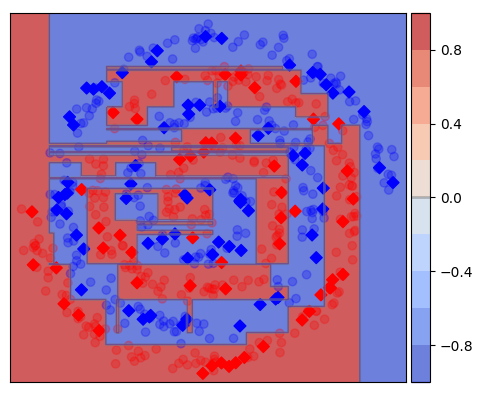

In [22]:
# DO NOT MODIFY THIS CELL. Simply execute it.
plot_decision_surface(X_train, y_train, X_test, y_test, best_dt)

In [23]:
# LEAVE BLANK

In [24]:
# LEAVE BLANK

In [25]:
# LEAVE BLANK

In [26]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 8: Model selection with Scikit-learn GridSearchCV</b>

The previous custom grid search was limited, as it only optimized the hyperparameters of a decision tree classifier on a simple 2D synthetic dataset. Now, let’s extend this process by using Scikit-learn’s `GridSearchCV` in combination with pipelines to broaden our search across a more complex dataset and test the parameters of each step within the pipeline.

This exercise is open-ended, allowing you to explore and tune hyperparameters from any pipeline component, such as scalers, imputers, transformers, encoders, or model algorithms. Don’t restrict yourself to linear models or decision trees; instead, experiment with a variety of models, such as XGBoost or SVM classifiers. Finally, return the estimated generalization performance of the selected model.

<br><i>[5 points]</i>
</div>
<div class="alert alert-success">

<b>About the two datasets used in this exercise</b>

<u>Context</u>

Superheroes have been in popular culture for a long time, and now more than ever. Since its creation, superheroes have not been diverse, but this is changing rapidly. The two datasets aim to provide an overview of heroes and their physical and power characteristics, helping curious people to identify trends and patterns. In this case, we want to understand how physical attributes and powers define superheroes' alignment (superhero, supervillain).

<u>Content</u>
    
The columns included in both datasets are: 
- **Dataset part 1**: Name, Gender, Eye color, Race, Hair color, Height, Publisher, Skin color, Alignment, Weight,Has Superpowers, Power Level, Intelligence Level
- **Dataset part 2**: Previous columns and, Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awareness, Cold Resistance, Durability, Stealth, Energy Absorption, Flight, Danger Sense, Underwater breathing, Marksmanship, Weapons Master, Power Augmentation, Animal Attributes, Longevity, Intelligence, Super Strength, Cryokinesis, Telepathy, Energy Armor, Energy Blasts, Duplication, Size Changing, Density Control, Stamina, Astral Travel,Audio Control, Dexterity, Omnitrix, Super Speed, Possession, Animal Oriented Powers, Weapon-based Powers, Electrokinesis, Darkforce Manipulation, Death Touch, Teleportation, Enhanced Senses, Telekinesis, Energy Beams, Magic, Hyperkinesis, Jump, Clairvoyance, Dimensional Travel, Power Sense, Shapeshifting, Peak Human Condition, Immortality, Camouflage, Element Control, Phasing, Astral Projection, Electrical Transport, Fire Control,Projection, Summoning, Enhanced Memory, Reflexes, Invulnerability, Energy Constructs, Force Fields, Self-Sustenance ,Anti-Gravity, Empathy, Power Nullifier, Radiation Control, Psionic Powers, Elasticity, Substance Secretion, Elemental Transmogrification, Technopath/Cyberpath, Photographic Reflexes, Seismic Power, Animation, Precognition, Mind Control, Fire Resistance, Power Absorption, Enhanced Hearing, Nova Force, Insanity, Hypnokinesis, Animal Control, Natural Armor, Intangibility, Enhanced Sight, Molecular Manipulation, Heat Generation, Adaptation, Gliding, Power Suit, Mind Blast, Probability Manipulation, Gravity Control, Regeneration, Light Control, Echolocation, Levitation, Toxin and Disease Control, Banish, Energy Manipulation, Heat Resistance, Natural Weapons, Time Travel, Enhanced Smell, Illusions, Thirstokinesis, Hair Manipulation, Illumination, Omnipotent, Cloaking, Changing Armor, Power Cosmic, Biokinesis, Water Control, Radiation Immunity, Vision - Telescopic, Toxin and Disease Resistance, Spatial Awareness, Energy Resistance, Telepathy Resistance, Molecular Combustion, Omnilingualism, Portal Creation, Magnetism, Mind Control Resistance, Plant Control, Sonar, Sonic Scream, Time Manipulation, Enhanced Touch, Magic Resistance, Invisibility, Sub-Mariner, Radiation Absorption, Intuitive aptitude, Vision - Microscopic, Melting, Wind Control, Super Breath, Wallcrawling, Vision - Night, Vision - Infrared, Grim Reaping, Matter Absorption, The Force, Resurrection, Terrakinesis, Vision - Heat, Vitakinesis, Radar Sense, Qwardian Power Ring, Weather Control, Vision - X-Ray, Vision - Thermal, Web Creation, Reality Warping, Odin Force, Symbiote Costume, Speed Force, Phoenix Force, Molecular Dissipation, Vision - Cryo, Omnipresent, Omniscient.

Column names are self-explanatory. Physical attributes are numerical or categorical, while superpowers are dummy (Onehot) variables.

</div>

<div class="alert alert-warning">
Before starting the grid search, merge the datasets using Pandas on name and publisher.
</div>

In [27]:
# DO NOT MODIFY NOR ADD CODE TO THIS CELL
import pandas as pd

df_physical_traits = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_superpowers.csv', index_col=False)
df_superpowers = pd.read_csv(' https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_%20physical_traits.csv', index_col=False)


---

### Step 1: Merge

To correctly perform the exercise, firstly we need to clean and merge the datasets. We have defined a funcion called remove_outliers which is designed to remove rows which contain outlier values.

In [28]:
def remove_outliers(df, columns=None, multiplier=1.5):
    
    # Select columns with dtype int or float if columns is None
    if columns is None:
        columns = df.select_dtypes(include=['int', 'float']).columns

    # Iterate through selected columns and remove outliers
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter the DataFrame to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

For each selected column, the function calculates the first quartile (Q1) and  third quartile (Q3), then determines the interquartile range (IQR) as Q3 - Q1. It also defines the lower and upper bounds for acceptable values as Q1 - multiplier * IQR and Q3 + multiplier * IQR. Then the Dataframe iterates to filter and exclude the colums where values fall outside these bounds. 

In [29]:
# Inspect first dataframe
df_physical_traits

,name,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Marvel Comics,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,Yellowjacket II,Marvel Comics,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
629,Ymir,Marvel Comics,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
630,Yoda,George Lucas,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
631,Zatanna,DC Comics,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Inspect second dataframe
df_superpowers

,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Has Superpowers,Power Level,Intelligence Level
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,False,Extremely Powerful,Super-Genius
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,Below Average,Average Intelligence
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,True,Average,Low Intelligence
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,False,Extremely Powerful,Smart
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0,False,Extremely Powerful,Genius
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0,True,Below Average,Genius
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,True,Extremely Powerful,Smart
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,False,Above Average,Super-Genius
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0,True,Average,Smart


After looking at the two dataframes we have seen the need to standardize the column names to ensure consistency and eliminating potencial issues, removing for example leading and trailing whitespace or converting all the names to lowercase.

In [31]:
# Standardize column names
df_physical_traits.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_superpowers.rename(columns=lambda x: x.strip().lower(), inplace=True)

Finally we complete the merger of the two datasets. After the standardization of the column names we can ensure that in both datasets the columns 'name' and 'publisher' will have the same format. The merger will ensure that only rows with common values in these columns are included in the final dataset, creating a unified view of the data.

In [32]:
# Merge datasets
merged_data = pd.merge(df_physical_traits, df_superpowers, on=['name', 'publisher'], how='inner')
merged_data

,name,publisher,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,...,eye color,race,hair color,height,skin color,alignment,weight,has superpowers,power level,intelligence level
0,A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,...,yellow,Human,No Hair,203.0,NaN,good,441.0,False,Extremely Powerful,Super-Genius
1,Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,...,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,True,Below Average,Average Intelligence
2,Abin Sur,DC Comics,False,False,True,False,False,False,False,False,...,blue,Ungaran,No Hair,185.0,red,good,90.0,True,Average,Low Intelligence
3,Abomination,Marvel Comics,False,True,False,False,False,False,False,False,...,green,Human / Radiation,No Hair,203.0,NaN,bad,441.0,False,Extremely Powerful,Smart
4,Abraxas,Marvel Comics,False,False,False,True,False,False,False,False,...,blue,Cosmic Entity,Black,-99.0,NaN,bad,-99.0,False,Extremely Powerful,Genius
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Marvel Comics,False,False,False,False,False,False,False,False,...,blue,Human,Strawberry Blond,165.0,NaN,good,52.0,True,Below Average,Genius
643,Ymir,Marvel Comics,False,False,False,False,True,True,False,False,...,white,Frost Giant,No Hair,304.8,white,good,-99.0,True,Extremely Powerful,Smart
644,Yoda,George Lucas,True,False,False,False,False,False,True,False,...,brown,Yoda's species,White,66.0,green,good,17.0,False,Above Average,Super-Genius
645,Zatanna,DC Comics,False,False,False,False,False,False,False,False,...,blue,Human,Black,170.0,NaN,good,57.0,True,Average,Smart


---

### Step 2: Preprocessing

After merging the two datasets into one we begin to preprocess and clean the unified data.

In [33]:
# Check column N/A's
merged_data_nas = merged_data.isna().sum()
merged_data_nas.sort_values(ascending=False)

skin color            577
race                  242
hair color            125
eye color             124
gender                 17
                     ... 
height                  0
weight                  0
has superpowers         0
power level             0
intelligence level      0
Length: 180, dtype: int64

We check the missing values and rank the columns accordingly from highest to lowest. Through this we see that there are a few highly unreliable variables with up to 89% missing values ('skin color'). The intended target variable also has a few missing values, which are eliminated with the following code, as they don't help us predict the alignment.

In [34]:
# Drop wherever the target variable is N/A
merged_data = merged_data.dropna(subset=['alignment'])

Moreover, besides 'good' and 'bad' there is also the alignment 'neutral' which again doesn't help our models predictions and is therefore eliminated.

In [35]:
# Filter valid target classes
relevant_alignments = ['good', 'bad']  # Only keep 'good' and 'bad'
merged_data = merged_data[merged_data['alignment'].isin(relevant_alignments)]

The numerical columns 'height' and 'weight' have negative value which in the context of this dataset doesn't make any sense and is interpreted by us as mistake in the data collection. We have decided to transform these columns into absolute values.

In [36]:
# Convert negative numerical values
merged_data[['height', 'weight']] = merged_data[['height', 'weight']].abs()

In [37]:
# Check merged dataframe for outliers
merged_data.describe()

,height,weight
count,617.000000,617.000000
mean,164.141005,107.035656
std,58.964912,83.901334
min,15.200000,2.000000
25%,99.000000,71.000000
50%,178.000000,97.000000
75%,185.000000,99.000000
max,975.000000,900.000000


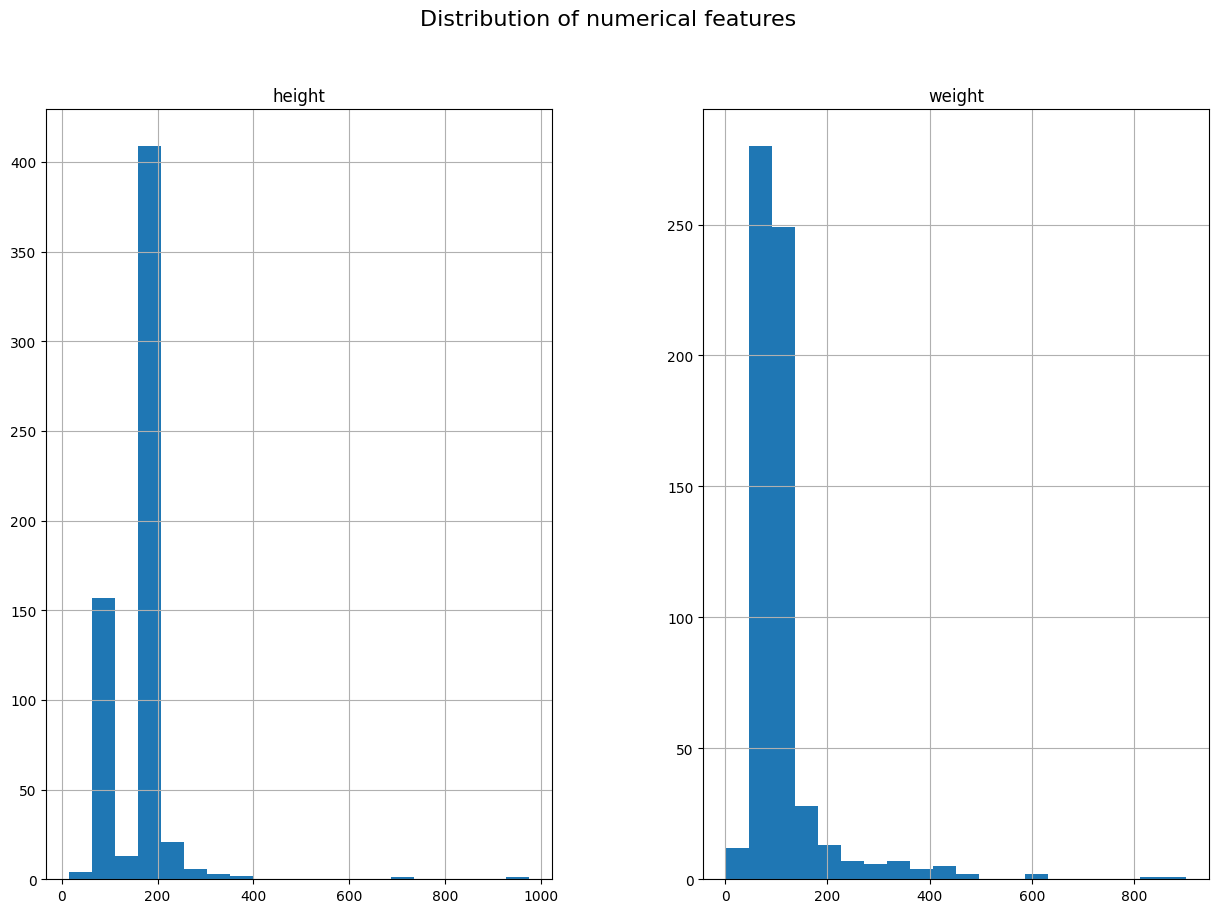

In [38]:
# Check merged dataframe for outliers using histogramm
merged_data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of numerical features", fontsize=16)
plt.show()

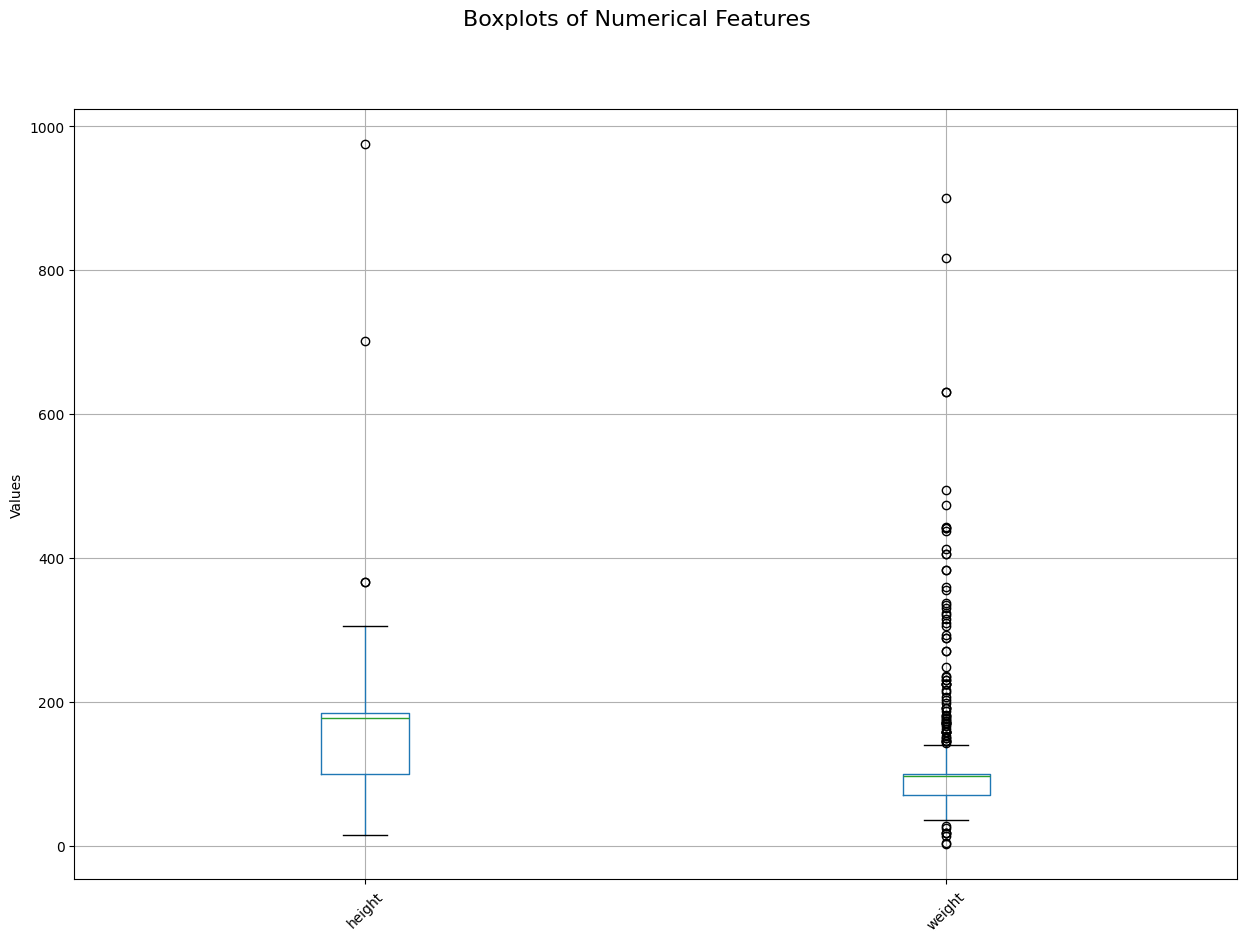

In [39]:
# Check merged dataframe for outliers using boxplot
merged_data.select_dtypes(include=['float64', 'int64']).boxplot(
    figsize=(15, 10), 
    rot=45,            # Rotate x-axis labels for better readability
    grid=True          # Add a grid for better visualization
)

plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.ylabel("Values")
plt.show()

After looking at the description of the dataframe it seems that there are a few outliers. We have confimed this by plotting a histogramm and boxplot of the value distribution and decided to move ahead and remove outliers using the previously determined IQR method.

In [40]:
# Remove outliers
merged_data = remove_outliers(merged_data)

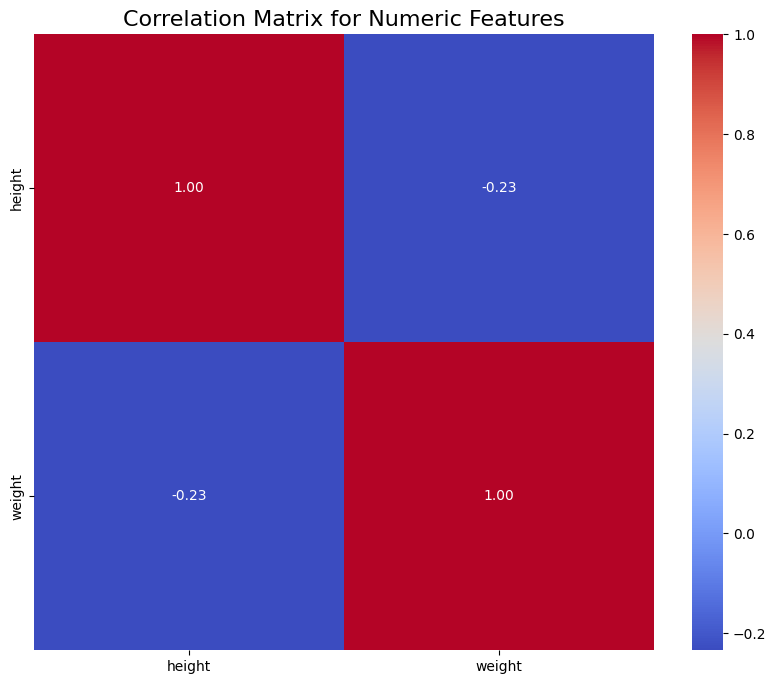

In [41]:
import seaborn as sns

# Check merged dataframe for correlation using matrix
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features", fontsize=16)
plt.show()

After checking for correlations in the values, we determined that there is no correlation affecting the model. Correlation is usually assumed with values higher than 0.8 in the correlation matrix. With this we have concluded the data preprocessing and deem any further actions as unnecessarily manipulating the dataset. We believe we have struck a good balance cleaning the data without interfering with the outcome.

---

### Step 3: Feature Selection

In terms of feature  selection, we first exclude the 'name' and 'publisher' columns, which are irrelevant to predicting the target variable, as well as the target variable itself, 'alignment'. This operation helps to avoid the model from fitting the target variable with information that is not relevant to prediction, thus improving the model's generalization ability and making its performance on new data more stable and reliable.

Second, among the remaining features, we screened for missing value cases, after we have determined in the preprocessing that there are potentially susceptible values. It is found that features such as Skin color, Race, Hair color and Eye color have missing rates of more than 10%. Features with high missingness are often difficult to stabilize in the model, and retaining them may require extensive filling strategies, and these filled values may introduce bias or noise, reducing the predictive performance of the model. For this reason, we decided to remove columns with missing rates greater than 10%. This decision not only simplifies the complexity of data preprocessing, but also reduces the potential risk of overfitting during model training.

In [42]:
# Target variable and feature selection
X = merged_data.drop(columns=['alignment', 'name', 'publisher'])  # Drop target variable and non-predictive columns (Name, Publisher)
X = X.loc[:, X.isna().mean() <= 0.1]  # Drop non-representative columns with >10% N/A's (Skin color, Race, Hair color, Eye color)
y = merged_data['alignment'].map({'good': 1, 'bad': 0})  # Map target to binary (1 for good, 0 for bad)

We now categorize features into numerical, ordinal, and categorical features based on their properties. This classification not only clarifies the characteristics of each type of feature, but also facilitates the selection of the most appropriate processing method according to the feature type, thus improving the predictive ability and stability of the model. For the ordinal features we have manually ranked the values in a way that makes logical sense.

In [43]:
# Feature categorization
numerical_features = ['height', 'weight']
ordinal_features = ['power level', 'intelligence level']
categorical_features = ['gender']

categories = [['Weak', 'Below Average', 'Average', 'Above Average', 'Extremely Powerful'],  # Define ranking of the 'Power Level' categories
              ['Low Intelligence', 'Average Intelligence', 'Smart', 'Genius', 'Super-Genius']]  # Define ranking of the 'Intelligence Level' categories


At last we perform a train test split to get a realistic generalization score, because the model was not tested on already seen data.

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### Step 4: Pipeline

In the pipeline stage of data processing, exclusive preprocessing steps are designed for different types of data to maximize data quality. For numeric features, averages are used to impute missing values because they better represent the central tendency of the data, reduce the impact of missing values on the overall distribution, and are simple and efficient. For ordinal features, filling in missing values with the most frequent value (or mode) preserves the main pattern of the feature, and the ordinal data is then converted to numerical values using the 'OrdinalEncoder' so that the model can recognize the natural order relationships of the data. For categorical features, missing values are also imputed with the most frequent values to ensure a balanced distribution of categories, and the categorical features are then converted to binary using the 'OneHotEncoder'. For those features that do not belong to any of the three specific categories, 'passthrough' is chosen to keep them as they are, so that they can be used flexibly in subsequent processing. Finally, these preprocessing steps are combined into a complete 'preprocessor' pipeline, which ensures that all data features are processed in an appropriate manner, laying the foundation for subsequent model training.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=categories))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

The final machine learning pipeline forms a complete and efficient process by combining the 'preprocessor' with the 'StandardScaler' and the 'DecisionTreeClassifier'. First, the 'preprocessor' preprocesses the different types of features in the dataset independently, followed by the 'StandardScaler', which normalizes the preprocessed numerical data and helps to eliminate model bias due to differences in magnitude between features, and finally the 'DecisionTreeClassifier'serves as an exemplary classification model to learn and predict the processed features.

In [46]:
# Machine learning pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

---

### Step 5: Grid Search

To test which model is the best and improving the generalization score, we have used five different models for this dataset and imported their libraries:

*1. Decision Tree Classifier*

This model splits data into groups based on feature values. The model is easy to interpret but needs tuning in order to avoid overfitting. It works well for datasets with mixed data types and straightforward patterns.

*2. Logistic Regression*

This is a simple model that predicts probabilities which works well with linear data.

*3. Random Forest Classifier*

This model combines multiple decision trees for better accuracy which reduces overfitting. It's robust and can effectivly handle datasets with many features.

*4. XGBoost Classifier*

This model uses a boosting system that improves predictions by focusing on errors. It excels in handling complex patterns in data.

*5. Support Vector Classifier (SVC)*

This model finds the best way to separate classes and works well with high dimensional data. It is versatile due to its kernel functions, making it suitable for both linear and nonlinear classification problems.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Grid search parameters
param_grid = [
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__max_depth': [5, 6],
        'classifier__min_samples_split': [5, 10],
        'classifier__min_samples_leaf': [2, 5],
    },
    {
        'classifier': [LogisticRegression(random_state=42)],
        'classifier__tol' : [0.1, 0.01, 0.001, 0.0001],
        'classifier__class_weight' : ['balanced'],
        'classifier__C' : [0.8, 1.0, 1.2],
        'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'classifier__max_iter' : [100, 200, 300]

    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [None, 10, 20, 50],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    {
        'classifier': [XGBClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'classifier__max_depth': [3, 6, 10],
        'classifier__subsample': [0.6, 0.8, 1.0]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__gamma': [0.01, 0.1, 'scale', 10]
    }
]

We have selected a wide array of impactful parameters to rigorously test most possible model combinations. The provided code performs grid search with cross-validation to find the best hyperparameters for a machine learning pipeline.

*1. GridSearchCV*
   
   - Automates hyperparameter tuning by testing different combinations of parameters specified in param_grid.
   - The cv=5 argument indicates 5 fold crossvalidation where the dataset is split into 5 parts, and the model is trained and validated 5 times, with each fold used as a validation set.

*2. pipe*

   - Integrates the previously created pipeline with the preprocessor, StandardScaler, and classifier which ensures consistent and efficient processing during each fold.

*3. param_grid*

   - Specifies a comprehensive range of hyperparameter options for different classifiers which results in 392 unique combinations.

*4. scoring=accuracy*

   - Optimizes for accuracy, ensuring the best performing model which maximizes correct predictions.

*5. verbose=1*

   - Provides a moderate level of updates during the grid search showing progress without overwhelming the console. In contrast, a higher verbose gives more detailed logs for each fold and fit which is useful for debugging but can clutter the console.

*Final: Fitting 5 folds for each of 392 candidates which total 1960 fits:*

  - The grid search evaluates 392 parameter combinations using 5-fold crossvalidation, resulting in 1960 individual model fits.
  - This reflects a computationally expensive process, indicating complexity of the hyperparameter tuning of the pipeline.

In [48]:
from sklearn.model_selection import GridSearchCV

# Grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


/Users/timonweidemann/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/timonweidemann/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/timonweidemann/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/timonweidemann/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/timonweidemann/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['height',
                                                                          'weight']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(categories=[['Weak',
                                                                                                                      'Below '
                                                                                                                      'Average',
                                                                                                                      'Average',
                                                                                                                      'Above '
                                                                                                                      'Aver...
                          'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                          'classifier__max_depth': [3, 6, 10],
                          'classifier__n_estimators': [50, 100, 200],
                          'classifier__subsample': [0.6, 0.8, 1.0]},
                         {'classifier': [SVC(random_state=42)],
                          'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__class_weight': ['balanced'],
                          'classifier__gamma': [0.01, 0.1, 'scale', 10],
                          'classifier__kernel': ['linear', 'rbf', 'poly']}],
             scoring='accuracy', verbose=1)

This code identifies the best-performing model from the grid search, including its optimal hyperparameters, using grid_search.and best_estimator_. It then evaluates the model's generalization performance on unseen test data by calculating the accuracy, which reflects how well the selected model outputs the best result on new data.


In [49]:
# Best model and generalization score
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
generalization_score = accuracy_score(y_test, y_test_pred)

---

### Step 6: Evaluation

##### **Generalization Score**
The generalization accuracy measures how well the trained model performs on unseen data, using the test dataset. This is a critical metric for assessing the model's ability to make accurate predictions on new data.

In [50]:
# Results
print(f'The generalization accuracy score of this model is {generalization_score}.')
print('To achieve this score, the following hyperparameters have been used:')
best_model

The generalization accuracy score of this model is 0.7009345794392523.
To achieve this score, the following hyperparameters have been used:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['height', 'weight']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Weak',
                                                                                               'Below '
                                                                                               'Average',
                                                                                               'Average',
                                                                                               'Above '
                                                                                               'Average',
                                                                                               'Extremely '
                                                                                               'Powerful'],...
                                                                                               'Genius',
                                                                                               'Super-Genius']]))]),
                                                  ['power level',
                                                   'intelligence level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=500, random_state=42))])

From the output, we understand that the pipeline achieved a generalization accuracy score of 0.7009. This means that the model can predict correctly 70.09% of the time on unseen data. The diagram also shows the structure of the pipeline, detailing the preprocessing steps and how they are applied to different types of data. 

##### **Classification Report**
A detailed breakdown of the model's predictive performance is provided by the classification report. This includes metrics such as precision, recall, and F1-score for each class.
The classification_report output allows us to identify how well the model performs across all target classes, highlighting areas where performance might be lacking.

In [51]:
from sklearn.metrics import classification_report

# Check Classification Report
y_pred = best_model.predict(X_test)
class_rep = classification_report(y_test, y_pred)

print(class_rep)

              precision    recall  f1-score   support

           0       0.75      0.17      0.27        36
           1       0.70      0.97      0.81        71

    accuracy                           0.70       107
   macro avg       0.72      0.57      0.54       107
weighted avg       0.71      0.70      0.63       107



From the output, we understand:

- Class 0: The model struggles to predict this class, with a very low recall of 0.17. This means it is identifying only 17% of the true cases of this class, leading to a low F1-score of 0.27.
- Class 1: The model performs much better for this class, with a high recall of 0.97 and a precision of 0.70, resulting in a strong F1-score of 0.81.
- Overall Accuracy: The model has an accuracy of 0.70, meaning it makes correct predictions for 70% of the total instances.

This highlights that the model is biased towards Class 1 and struggles to predict Class 0 accurately, which may be due to class imbalance or feature-related issues.

##### **Confusion Matrix**
We are using a confusion matrix to further evaluate the performance of our classification model. A confusion matrix provides a visual summary of the model's predictions compared to the actual labels, showing how well the model distinguishes between different classes.

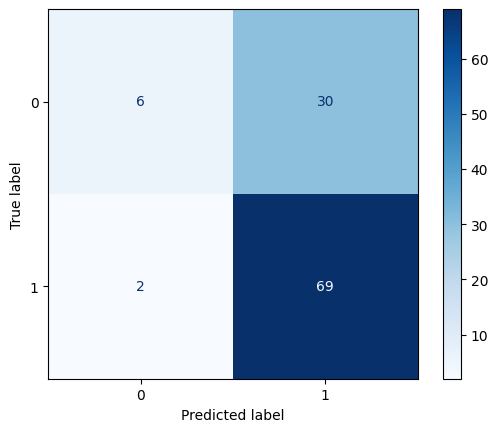

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps['classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['classifier'].classes_)

# Plot the confusion matrix
disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

From the confusion matrix output:

- Class 0: The model correctly identified 6 instances as Class 0 but misclassified 30 instances as Class 1. This indicates poor performance for Class 0.
- Class 1: The model correctly identified 69 instances as Class 1 but misclassified 2 instances as Class 0. This shows strong performance for Class 1.

This visualization underlines our previous interpretation that the model performs well for Class 1 but struggles significantly with Class 0. This imbalance suggests that the model is biased towards Class 1, possibly due to an unequal distribution of the classes in the dataset or other factors on the feature side affecting prediction.

---

### Step 6: Interpretation of Results

Due to a highly unbalanced dataset with a wide array of different variables the best model wasn't able to get a higher generalization score than 70%. The model is very biased towards predicting every superhero as being good, with a recall and F1-score for '0' at 17% and 27% respectively.

- Class Imbalance: The confusion matrix and classification report clearly show that the model is heavily biased towards one class, leading to poor recall and precision for the other class.

- High Recall for Class 1: While the model shows high recall for the class 1, it comes at the cost of misclassifying many class 0 instances, indicating a trade-off between sensitivity and specificity.

- Generalization Concerns: The overall performance, with a generalization score of approximately 70%, suggests that the model may have difficulty applying learned patterns to unseen data, especially for underrepresented cases.

- Bias in Predictions: The bias towards predicting most superheroes as "good" limits the model’s usefulness in applications where accurately distinguishing both classes is crucial, such as in decision-making tasks involving balanced predictions.